# Breast Cancer prediction

Importing required packages

In [41]:
import numpy as np
import pandas as pd

from time import time

%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn import metrics

# For splitting dataset
from sklearn.cross_validation import ShuffleSplit, train_test_split

import sklearn.learning_curve as curves
from sklearn.learning_curve import validation_curve

# k-fold cross validation
from sklearn.cross_validation import KFold, cross_val_score

# Import sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [42]:
all_data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
all_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
all_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Converting target catogerial data into numerical data

In [44]:
all_data = all_data.drop(['id', 'Unnamed: 32'], axis = 1)
all_data['diagnosis'] = all_data['diagnosis'].map({'M':1,'B':0})
all_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Creating features and target for ML models

In [45]:
target = all_data['diagnosis']
features = all_data.drop('diagnosis', axis = 1)
all_features = list(features.columns[0:11])
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
target.unique()

array([1, 0], dtype=int64)

In [47]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Splitting feature data into training and testing data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= .3,random_state=0)

In [49]:
Kfold = KFold(len(all_data),n_folds = 10,shuffle = False)

Function to train model and get model efficiency

In [50]:
def train_and_predict_model(model, model_name, X_train, X_test, y_train, y_test, selected_cols):
    t0 = time()
    model.fit(X_train[selected_cols], y_train)
    train_time = time() - t0
    
    t1 = time()
    pred = model.predict(X_test[selected_cols])
    predict_time = time() - t1
    
    score = f1_score(y_test, pred)
    
    print ("f1_score of {} is {}".format(model_name, score))
    print ("Accuracy of {} is {}".format(model_name, metrics.accuracy_score(y_test, pred)))
    print ("cross_val_score of {} is {}".format(model_name, cross_val_score(model, features[selected_cols], target , cv = 10).mean()))
    
    print ("Time taken to train {} is {}".format(model_name, train_time))
    print ("Time taken to predict {} is {}".format(model_name, predict_time))

Fuction to plot model accuracy

In [51]:
def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a Random Forest at max_depth = depth
        classifier = RandomForestClassifier(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(classifier, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'accuracy')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Random Forest Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(RandomForestClassifier(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'accuracy')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Random Forest Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()
    
    
def ModelValidation(X, y):
    param_range = np.arange(1,11)
    train_scores, test_scores = validation_curve(
        RandomForestClassifier(), X, y, param_name="max_depth", param_range=param_range,
        cv=10, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with Random Forest")
    plt.xlabel("$\max_depth$")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

C:\Users\RohitRaj\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


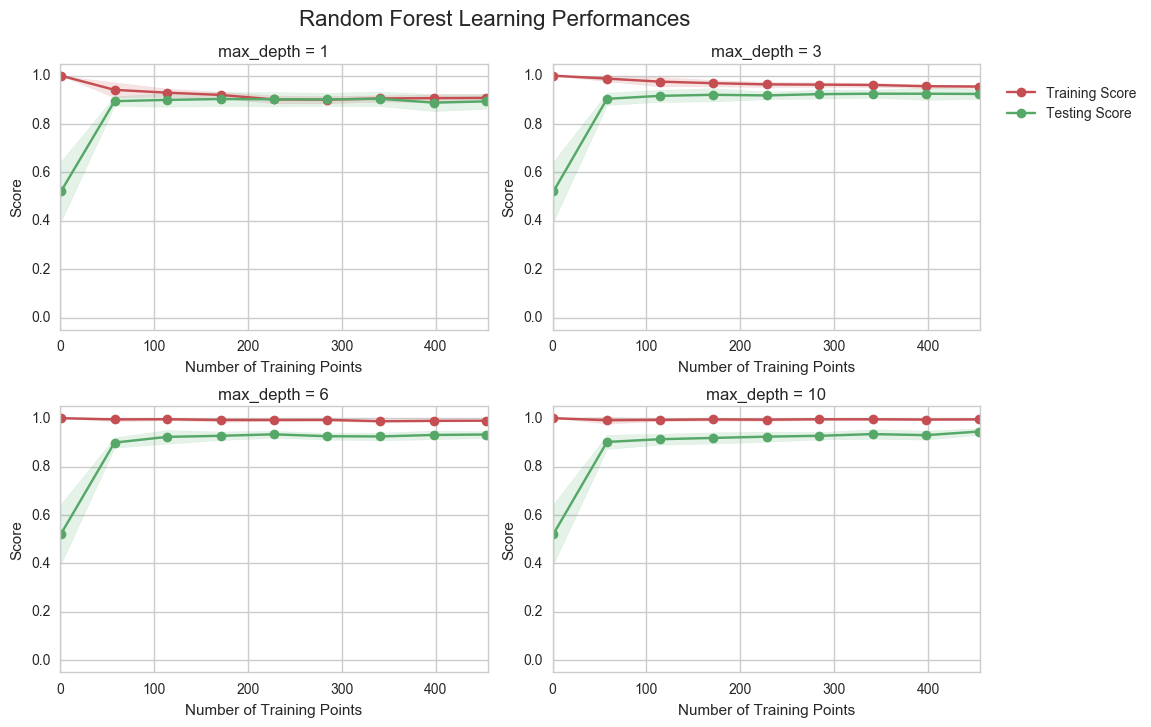

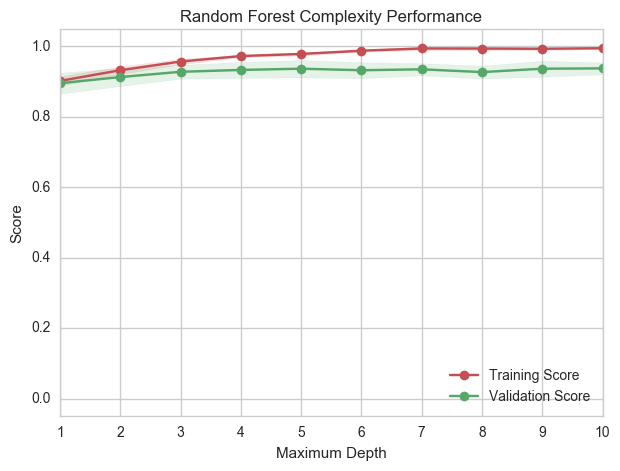

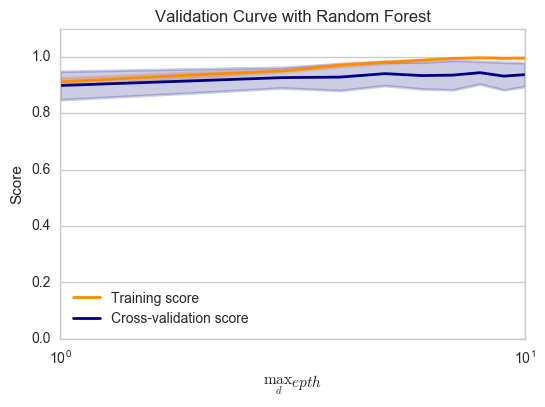

In [52]:
ModelLearning(features[all_features], target)
ModelComplexity(features[all_features], target)
ModelValidation(features[all_features], target)

Checking model using Random Forest on all features data

In [53]:
total_features = list(features.columns)
Forest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
train_and_predict_model(Forest, 'Random Forest', X_train, X_test, y_train, y_test, all_features)

f1_score of Random Forest is 0.8818897637795274
Accuracy of Random Forest is 0.9122807017543859
cross_val_score of Random Forest is 0.9370171117448794
Time taken to train Random Forest is 0.03200173377990723
Time taken to predict Random Forest is 0.002000093460083008


Initializing ML models

In [54]:
dt = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression()
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
sv = SVC(kernel='linear',C=1)
boost = AdaBoostClassifier()

Predicting on all features data

In [55]:
for clf, name in [(dt, 'DecisionTree'),
                  (lr, 'Logistic'),
                  (rfc, 'Random Forest'),
                  (sv, 'Support Vector Classification'),
                  (boost, 'AdaBoost Classifier')]:
    print ("---------------------------------------------------------------------")
    train_and_predict_model(clf, name, X_train, X_test, y_train, y_test, all_features)
    

---------------------------------------------------------------------
f1_score of DecisionTree is 0.90625
Accuracy of DecisionTree is 0.9298245614035088
cross_val_score of DecisionTree is 0.9124827154092128
Time taken to train DecisionTree is 0.007000446319580078
Time taken to predict DecisionTree is 0.0009999275207519531
---------------------------------------------------------------------
f1_score of Logistic is 0.8780487804878048
Accuracy of Logistic is 0.9122807017543859
cross_val_score of Logistic is 0.9070650764843142
Time taken to train Logistic is 0.0030002593994140625
Time taken to predict Logistic is 0.0009999275207519531
---------------------------------------------------------------------
f1_score of Random Forest is 0.9375
Accuracy of Random Forest is 0.9532163742690059
cross_val_score of Random Forest is 0.931783121597096
Time taken to train Random Forest is 0.017000913619995117
Time taken to predict Random Forest is 0.002000093460083008
----------------------------------

Getting important features using feature_importances_ of RandomForest

[(0.24690000000000001, 'concave points_mean'), (0.13739999999999999, 'radius_se'), (0.10639999999999999, 'area_mean'), (0.10390000000000001, 'compactness_mean'), (0.095699999999999993, 'perimeter_mean'), (0.071900000000000006, 'concavity_mean'), (0.066400000000000001, 'texture_mean'), (0.065500000000000003, 'radius_mean'), (0.046800000000000001, 'fractal_dimension_mean'), (0.032199999999999999, 'symmetry_mean'), (0.026800000000000001, 'smoothness_mean')]


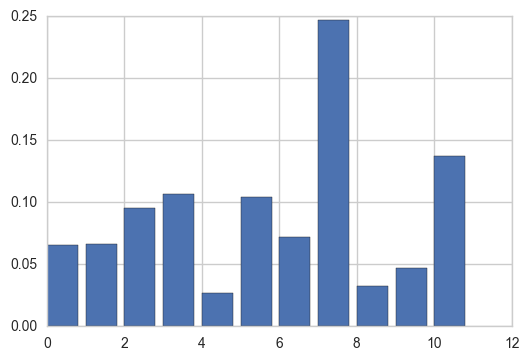

In [56]:
importance = Forest.feature_importances_
names = list(features)
pyplot.bar(range(len(importance)), importance)
print (sorted(zip(map(lambda x: round(x, 4), importance), names), 
             reverse=True))
pyplot.show()

In [37]:
selected_features = ['radius_mean', 'concavity_mean', 'compactness_mean', 'smoothness_mean', 'concave points_mean', 'perimeter_mean', 'radius_se']

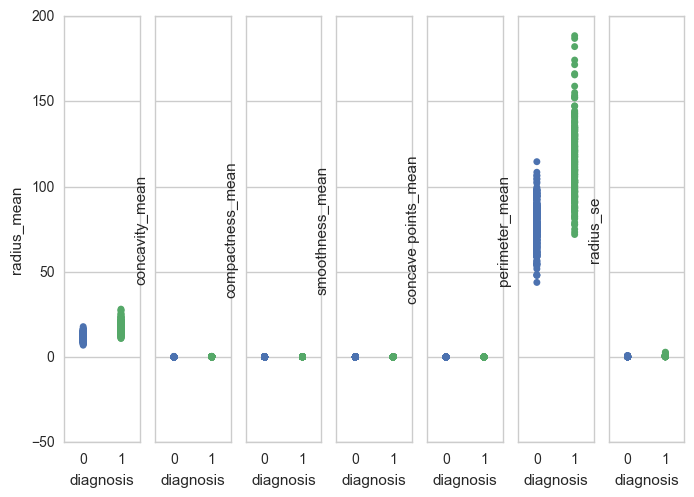

In [57]:
sns.set(style="whitegrid", color_codes=True)
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=7, sharey=True)
tups = (ax1, ax2, ax3, ax4, ax5, ax6, ax7)
for i in range(len(selected_features)):
    sns.stripplot(x='diagnosis', y=selected_features[i], data=all_data, ax = tups[i]);

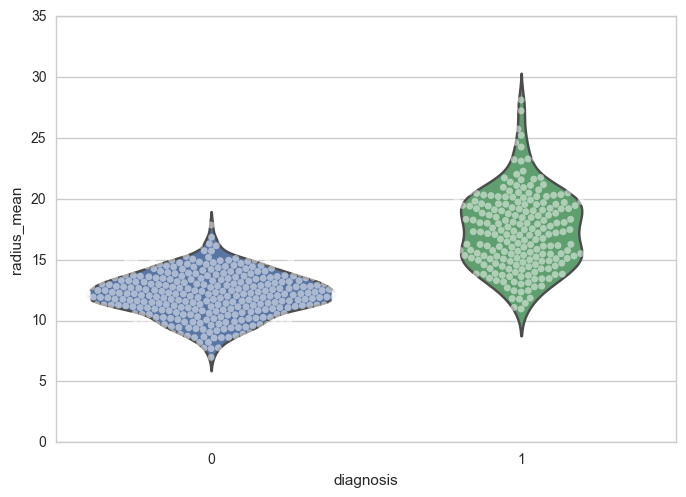

In [39]:
sns.violinplot(x="diagnosis", y="radius_mean", data=all_data, inner=None)
sns.swarmplot(x="diagnosis", y="radius_mean", data=all_data, color="w", alpha=.5);

Predicting on important features only. Training is pretty fast with only little less accuracy. :)

In [40]:
for clf, name in [(dt, 'DecisionTree'),
                  (lr, 'Logistic'),
                  (rfc, 'Random Forest'),
                  (sv, 'Support Vector Classification'),
                  (boost, 'AdaBoost Classifier')]:
    print ("---------------------------------------------------------------------")
    train_and_predict_model(clf, name, X_train, X_test, y_train, y_test, selected_features)

---------------------------------------------------------------------
f1_score of DecisionTree is 0.8992248062015504
Accuracy of DecisionTree is 0.9239766081871345
cross_val_score of DecisionTree is 0.9069408434880304
Time taken to train DecisionTree is 0.008000373840332031
Time taken to predict DecisionTree is 0.002000093460083008
---------------------------------------------------------------------
f1_score of Logistic is 0.8760330578512397
Accuracy of Logistic is 0.9122807017543859
cross_val_score of Logistic is 0.9070337481635123
Time taken to train Logistic is 0.007000446319580078
Time taken to predict Logistic is 0.002000093460083008
---------------------------------------------------------------------
f1_score of Random Forest is 0.8661417322834646
Accuracy of Random Forest is 0.9005847953216374
cross_val_score of Random Forest is 0.91069484054965
Time taken to train Random Forest is 0.01800084114074707
Time taken to predict Random Forest is 0.0030002593994140625
---------------

C:\Users\RohitRaj\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


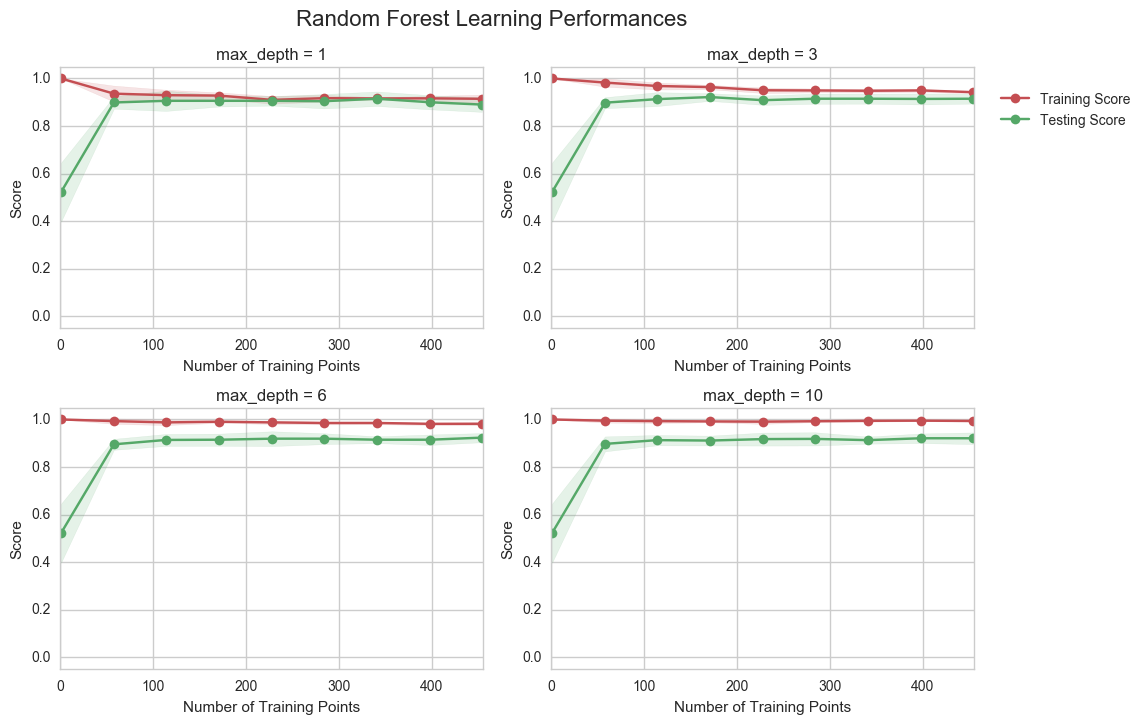

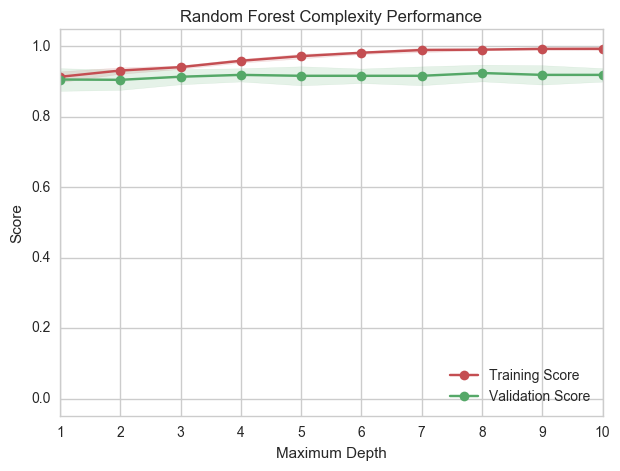

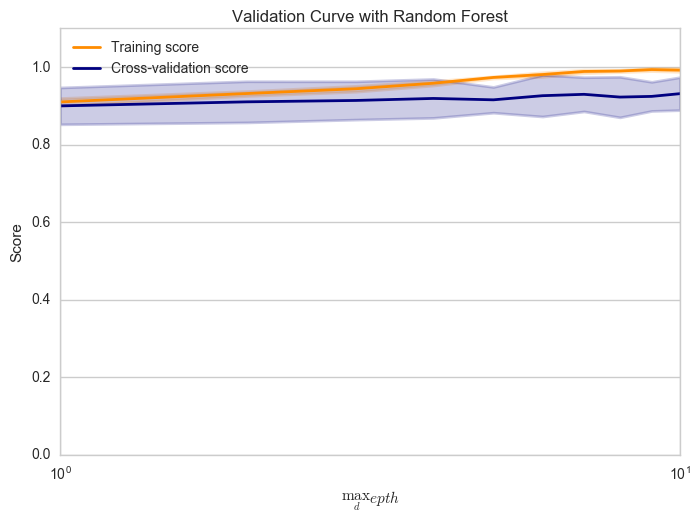

In [63]:
ModelLearning(features[selected_features], target)
ModelComplexity(features[selected_features], target)
ModelValidation(features[selected_features], target)